In [15]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Ángel Jaramillo Valencia
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

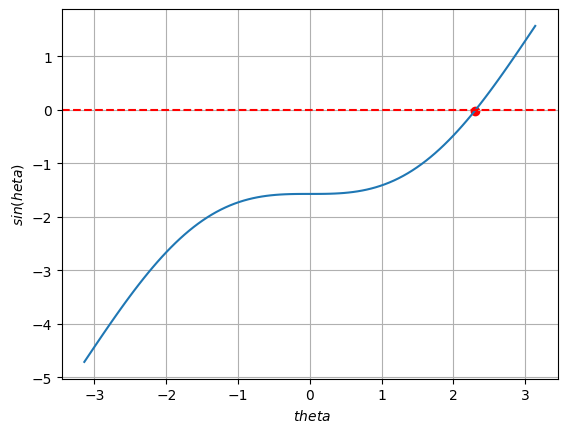

,sen(theta)
2.0,-0.480094
2.1,-0.334006
2.2,-0.179293
2.3,-0.016502
2.4,0.153740
2.5,0.330732
2.6,0.513702
2.7,0.701824
2.8,0.894216
2.9,1.089954


In [16]:
theta = np.linspace(-np.pi, np.pi, 100)

f = lambda x: x - np.sin(x) - np.pi/2

y = f(theta)

plt.plot(theta, y)
plt.axhline(0, color='red', linestyle='--')
plt.scatter(2.3, f(2.3), color = 'red')
plt.xlabel('$\ theta$')
plt.ylabel('$ sin(\theta)$')
plt.grid()
plt.show()

theta_df = np.array([f(i) for i in np.arange(2, 3, 0.1)])

theta_df = pd.DataFrame(data=theta_df, index = np.arange(2, 3, 0.1), columns=['sen(theta)'])

theta_df

Vemos que la solución de dicha ecuación se encuentra al rededor de 2.3

In [17]:
from scipy.optimize import bisect
from scipy.optimize import fixed_point
from scipy.optimize import newton
from scipy.optimize import root_scalar

In [18]:
print(f' Mediante el método de bisección, el cero de la función se encuentra en: {bisect(f, 2.3, 2.4)}')
print('\n')
print(f'Mediante el método de Newton, el cero de la función se encuentra en: {(newton(f, 2.3))}')
print('\n')
print(f'Mediante el método de la Secante, la información de la convergencia es: {(root_scalar(f, x0 = 2.3, method = "secant"))}')

 Mediante el método de bisección, el cero de la función se encuentra en: 2.3098814600103648


Mediante el método de Newton, el cero de la función se encuentra en: 2.3098814600100575


Mediante el método de la Secante, la información de la convergencia es:       converged: True
           flag: converged
 function_calls: 5
     iterations: 4
           root: 2.3098814600100575
         method: secant


Efectivamente, el cero de la función se encuentra en 2.3

La función no convergió con el método de Punto Fijo debido a que, cuando despejamos $x$, queda una ecuación de la forma $\theta = 2 $ * $\mathrm{sin} ^ {-1}\ $ ($\theta$ - $\pi$/2), la cual toma valores muy grandes, lo cual hace imposible que converja.

# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


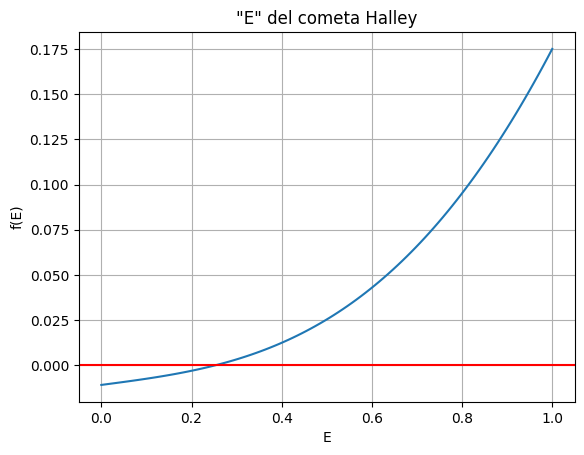

In [19]:
E = np.linspace(0, 1, 100)

e = 0.9672671
t0 = 1986.1113
T = 75.96000
t = 1986.24383 # Pasaron 51 días entre el 9 de febrero y el primero de abril de 1986

M = ((2 * np.pi) * (t - t0)) / T

f = lambda E: E - e * np.sin(E) - M

plt.plot(E, f(E))
plt.xlabel('E')
plt.title('"E" del cometa Halley')
plt.axhline(0, color = 'red', linestyle = '-')
plt.ylabel('f(E)')
plt.grid()
plt.show()

2.6575709791874037e-16


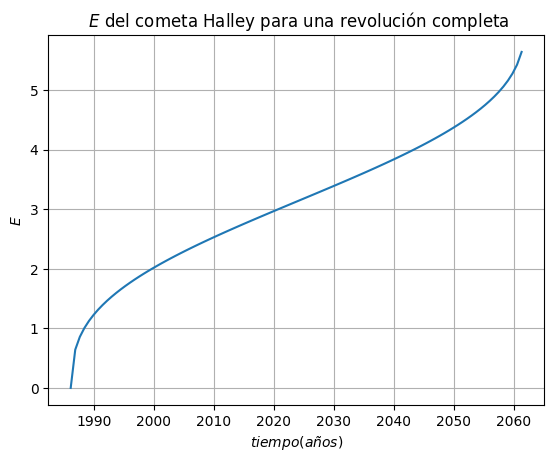

In [27]:
e = 0.9672671
t0 = 1986.1113
T = 75.96000
dt = T / 100
t = []
soluciones = []

for i in range(100):

  t.append(t0 + i  * dt)

for j in range(len(t)):

  E1 = lambda E: E - e * np.sin(E) - (2 * np.pi * (t[j] - t0)) / T

  valores = (root_scalar(E1, x0 = 1, method = 'secant'))


  soluciones.append(valores.root)

plt.plot(t, soluciones)
plt.xlabel('$tiempo (años)$')
plt.ylabel('$E$')
plt.title(' $E$ del cometa Halley para una revolución completa')
plt.grid()

print(soluciones[0])

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [21]:
t = 0.5

m = lambda m: np.tanh(m / t) - m

solucion_n = newton(m, 1)
solucion_s = root_scalar(m, x0 = 1, method = 'secant')

print(f'La magnetización reducida con el método de Newton-Raphson es: {round(solucion_n, 4)}')
print(f'La magnetización reducida con el método de la secante es: {round(solucion_s.root, 4)}')

La magnetización reducida con el método de Newton-Raphson es: 0.9575
La magnetización reducida con el método de la secante es: 0.9575


In [22]:
m1 = lambda m1: np.tanh(m1 / t)

solucion_p = fixed_point(m1, 1)

print(f'La magnetización reducida con el método del Punto fijo es: {np.round(solucion_p, 4)}')

La magnetización reducida con el método del Punto fijo es: 0.9575


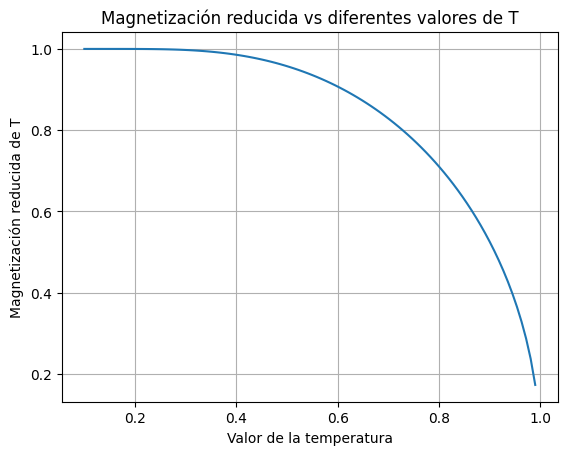

In [28]:
T = np.linspace(0.1, 0.99, 100)
valores = []

for i in range(len(T)):

  m2 = lambda m2: np.tanh(m2 / T[i]) - m2

  solucion_se = root_scalar(m2, x0 = 1, method = 'secant')

  valores.append(solucion_se.root)

plt.plot(T, valores)
plt.title('Magnetización reducida vs diferentes valores de T')
plt.xlabel('Valor de la temperatura')
plt.ylabel('Magnetización reducida de T')
plt.grid()